<a href="https://colab.research.google.com/github/kirmanioussema12/Deep-Learning/blob/main/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np

# Initialisation des poids
np.random.seed(0)  # Pour la reproductibilité
W1 = np.random.rand(2, 3) * 0.1
W2 = np.random.rand(3, 2) * 0.1

# Fonction d'activation sigmoïde
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Dérivée de la fonction d'activation
def sigmoid_derivative(x):
    return x * (1 - x)

# Entrée
x = np.array([1, 2, 3])

# Sortie théorique
y = np.array([0, 1, 0])

# Paramètres d'apprentissage
threshold = 0.01
eta = 0.1
max_iterations = 10000  # Limite d'itérations pour éviter les boucles infinies

# Compteur d'itérations
iterations = 0

while True:
    # Feedforward
    z1 = np.dot(W1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1)
    a2 = sigmoid(z2)  # Sortie réelle

    # Calcul de l'erreur
    error = a2 - y

    # Vérification de l'erreur
    if np.mean(np.abs(error)) < threshold or iterations >= max_iterations:
        break

    # Rétropropagation
    delta2 = error * sigmoid_derivative(a2)
    delta1 = np.dot(W2.T, delta2) * sigmoid_derivative(a1)

    # Mise à jour des poids
    W2 -= eta * np.outer(delta2, a1)
    W1 -= eta * np.outer(delta1, x)

    # Incrémenter le compteur d'itérations
    iterations += 1

# Affichage des résultats
print("Sortie réelle après feedforward:", a2)
print("Erreur par rapport à la sortie théorique:", error)
print("Nombre d'itérations:", iterations)
print("Poids W1 finaux:", W1)
print("Poids W2 finaux:", W2)


Sortie réelle après feedforward: [0.01638466 0.98363047 0.01638425]
Erreur par rapport à la sortie théorique: [ 0.01638466 -0.01636953  0.01638425]
Nombre d'itérations: 10000
Poids W1 finaux: [[0.34900142 0.65975908 0.94263656]
 [0.34796372 0.62931628 0.94501561]]
Poids W2 finaux: [[-2.10860973 -2.03319402]
 [ 2.11383114  2.02891984]
 [-2.07278347 -2.06906828]]


<ipython-input-23-2d83b00203f1>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # Colors for weights from negative to positive


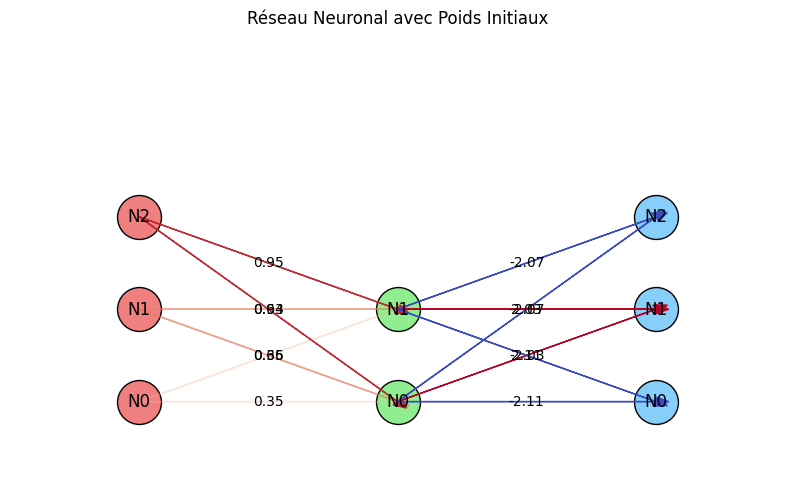

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Updated visualization function with weights on arrows and improved colors
def plot_neural_network(W1, W2):
    plt.figure(figsize=(10, 6))

    # Defining layer sizes and neuron positions (3 input, 2 hidden, 3 output)
    layer_sizes = [3, 2, 3]  # [Input, Hidden, Output]
    layers = []
    for i, size in enumerate(layer_sizes):
        layers.append([(i, j) for j in range(size)])

    # Neuron positions for proper layout
    pos = {}
    for layer_idx, layer in enumerate(layers):
        for neuron_idx in range(len(layer)):
            pos[(layer_idx, neuron_idx)] = (layer_idx * 2, neuron_idx)  # Spacing between layers

    # Define colors for neurons
    neuron_colors = ['lightcoral', 'lightgreen', 'lightskyblue']

    # Draw neurons with different colors for each layer
    for layer_idx, layer in enumerate(layers):
        for neuron in layer:
            plt.scatter(pos[neuron][0], pos[neuron][1], s=1000, color=neuron_colors[layer_idx], edgecolor='black')
            plt.text(pos[neuron][0], pos[neuron][1], f'N{neuron[1]}', fontsize=12, ha='center', va='center')

    # Create a colormap for the weights
    cmap = cm.get_cmap('coolwarm')  # Colors for weights from negative to positive

    # Draw weights from input to hidden layer with weight annotations
    for i in range(W1.shape[1]):  # Neurons in the input layer
        for j in range(W1.shape[0]):  # Neurons in the hidden layer
            weight = W1[j, i]
            alpha = np.clip(np.abs(weight), 0, 1)  # Normalize the transparency based on weight
            color = cmap((weight + 1) / 2)  # Normalize color from -1 to 1
            plt.arrow(pos[(0, i)][0], pos[(0, i)][1],
                      pos[(1, j)][0] - pos[(0, i)][0], pos[(1, j)][1] - pos[(0, i)][1],
                      head_width=0.1, head_length=0.1, fc=color, ec=color, alpha=alpha)
            plt.text((pos[(0, i)][0] + pos[(1, j)][0]) / 2,
                     (pos[(0, i)][1] + pos[(1, j)][1]) / 2,
                     f'{weight:.2f}', fontsize=10, ha='center', va='center', color='black')

    # Draw weights from hidden to output layer with weight annotations
    for i in range(W2.shape[1]):  # Neurons in the hidden layer
        for j in range(W2.shape[0]):  # Neurons in the output layer
            weight = W2[j, i]
            alpha = np.clip(np.abs(weight), 0, 1)  # Normalize the transparency based on weight
            color = cmap((weight + 1) / 2)  # Normalize color from -1 to 1
            plt.arrow(pos[(1, i)][0], pos[(1, i)][1],
                      pos[(2, j)][0] - pos[(1, i)][0], pos[(2, j)][1] - pos[(1, i)][1],
                      head_width=0.1, head_length=0.1, fc=color, ec=color, alpha=alpha)
            plt.text((pos[(1, i)][0] + pos[(2, j)][0]) / 2,
                     (pos[(1, i)][1] + pos[(2, j)][1]) / 2,
                     f'{weight:.2f}', fontsize=10, ha='center', va='center', color='black')

    # Adjust plot limits and remove axes
    plt.xlim(-1, 5)
    plt.ylim(-1, 4)
    plt.title('Réseau Neuronal avec Poids Initiaux')
    plt.axis('off')
    plt.grid(False)
    plt.show()

# Call the function to visualize the network with weights
plot_neural_network(W1, W2)
